# Mean-Field Optimal Execution - MF Q-Learning report

> Tip: The notebook assumes `mf_optimal_execution` package is installed (editable mode is fine):  
> `pip install -e ..` and restart the kernel.

In [18]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from mf_optimal_execution.models import PriceImpactModel
from mf_optimal_execution.solutions import OptimalExecutionSolutionPDE_MFG
from mf_optimal_execution.utils import setup_plt
from mf_optimal_execution.config import Config

In [19]:
CHECKPOINTS_PATH = Path("../checkpoints")

checkpoint_path = None
if checkpoint_path is None:
    candidates = sorted((p for p in CHECKPOINTS_PATH.glob("rl_mfg_*.npy")), key=lambda p: p.stat().st_mtime, reverse=True)
    checkpoint_path = candidates[0]

print(f"Will load: '{checkpoint_path.name}'")

Will load: 'rl_mfg_1760120701.npy'


## Load checkpoint

In [20]:
setup_plt()

ckpt = np.load(checkpoint_path, allow_pickle=True).item()

cfg = Config(**ckpt["config"])

dyn = PriceImpactModel(cfg.sigma, cfg.gamma, cfg.ca, cfg.cx, cfg.cg)
sol = OptimalExecutionSolutionPDE_MFG(dyn, cfg)

# Recreate and load model
q = ckpt["q"]
v = ckpt["v"]
state_space = ckpt["state_space"]
action_space = ckpt["action_space"]
time_steps = ckpt["time_steps"]

## Plot results

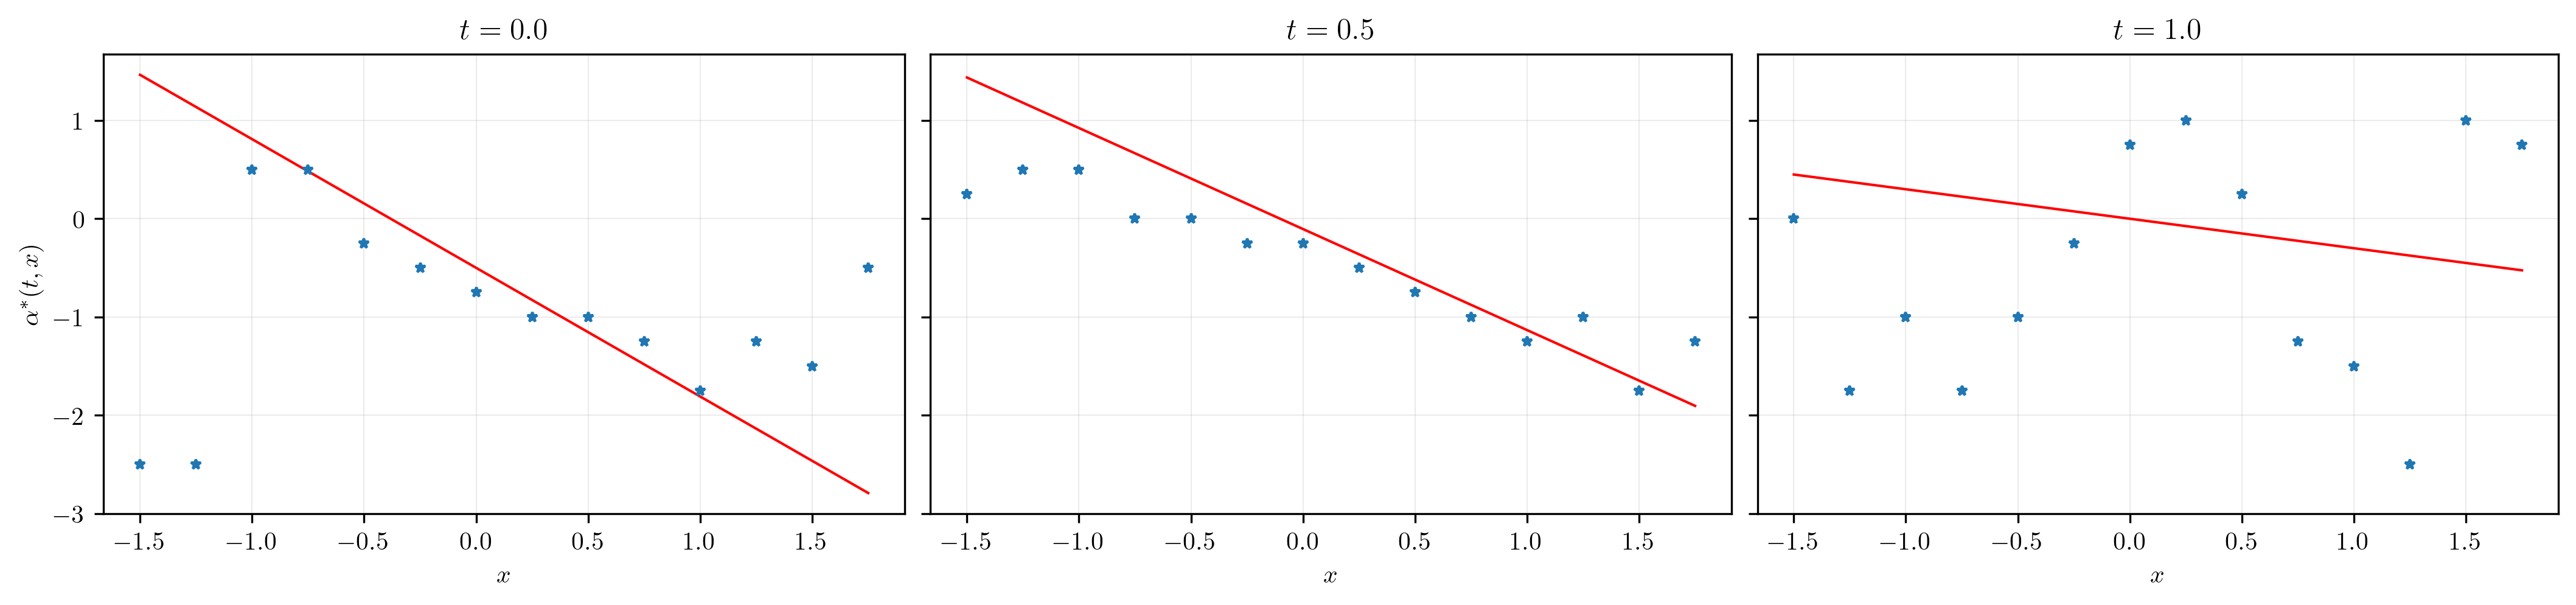

In [ ]:
xx = np.linspace(state_space[0], state_space[-1], 100)

fig, axs = plt.subplots(1, 3, figsize=(14, 3.2), dpi=300, sharey=True, constrained_layout=True)

for t, ax in zip([0.0, 0.5, 1.0], axs):
    a_star_idx = np.argmin(q[int(time_steps * t)], axis=1)
    ax.plot(xx, sol.alpha(t, xx), lw=1, c="red")
    ax.plot(state_space, action_space[a_star_idx], "*", ms=4)
    ax.grid(lw=0.5, alpha=0.25)
    ax.set_title(rf"$t={t}$")
    ax.set_xlabel(r"$x$")
    if t == 0.0:
        ax.set_ylabel(r"$\alpha^*(t,x)$")

plt.show()